<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [0]:
np.random.seed(19680801)

In [0]:
X = np.linspace(0.5, 3.5, 100)
Y1 =3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1,Y2,len(X))

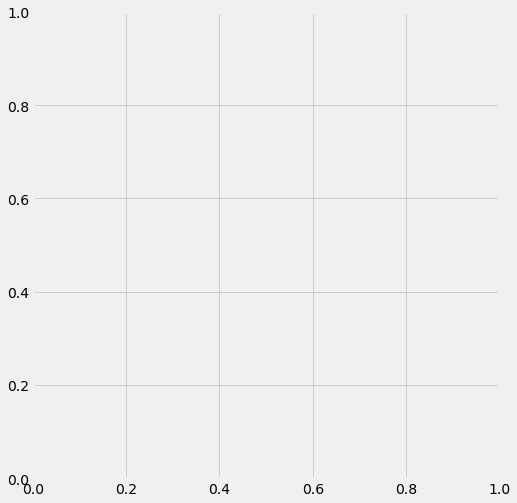

In [111]:
fig =plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1, aspect=1)

In [0]:
def minor_tick(x,pos):
  if not x% 1.0:
    return ''
  return '%.2f' % x

In [0]:
ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

In [114]:
ax.set_ylim(0, 4)
ax.set_ylim(0, 4)

(0, 4)

In [0]:
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='major', width=1.0, labelsize=10)
ax.tick_params(which='major', length=5, labelsize=10, labelcolor='0.25')

In [0]:
ax.grid(linestyle='--', linewidth=0.5, color='.25', zorder=-10)

In [117]:
ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()



In [0]:
def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x,y), radius, clip_on=False, zorder=10, linewidth=1,
                   edgecolor='black', facecolor=(0, 0, 0, .0125),
                   path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)

In [0]:
def text(x, y, text):
  ax.text(x, y, text, backgroundcolor='white',
         ha= 'center', va='top', weight='bold', color='blue')

In [0]:
# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

In [121]:
color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
           weight='bold', color=color,
           arrowprops=dict(arrowstyle='->',
                          connectionstyle='arc3',
                          color=color))

Text(3.3, 0.5, 'Spines')

In [122]:
ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
           weight='bold', color=color,
           arrowprops=dict(arrowstyle='->',
                          connectionstyle='arc3',
                          color=color))

Text(3.45, 0.45, '')

In [123]:
ax.text(4.0, -0.4, 'Made with http://matplotlib.org',
       fontsize=10, ha='right', color='.5')
plt.show

<function matplotlib.pyplot.show>

##Matplotlib PyPlot Syntax (plt
Good for when you're making 1 fairly straightforward, and not highly customized graph.

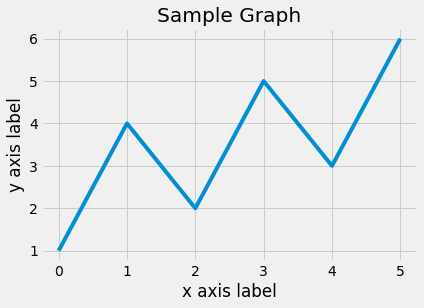

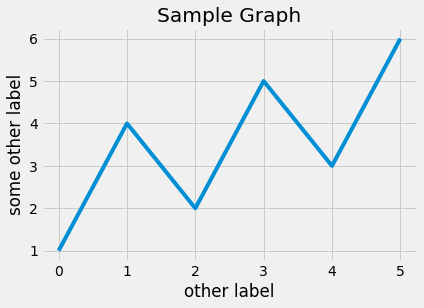

In [124]:
import matplotlib.pyplot as plt

sample_data = [1,4,2,5,3,6]
plt.plot(sample_data)
plt.title('Sample Graph')
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.show()

more_data = [6,4,5,3,4,2]
plt.plot(sample_data)
plt.title('Sample Graph')
plt.xlabel('other label')
plt.ylabel('some other label')
plt.show()

##Matplotlib's fig, ax Syntax(also known as object oriented syntax)
- For multiple axes (called subplots)
- When you need to heavily customized something

Text(0.5, 0, 'my x label')

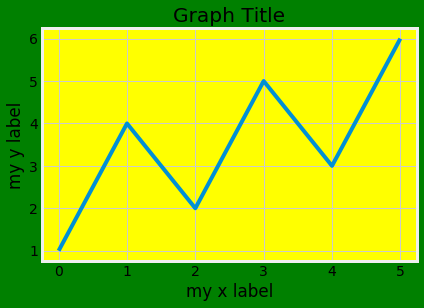

In [125]:
fig, ax = plt.subplots()

fig.patch.set(facecolor='green')

ax.plot(sample_data)
ax.set(facecolor='yellow')
ax.set_title('Graph Title')
ax.set_ylabel('my y label')
ax.set_xlabel('my x label')


#MakingExplanatory Visualizations with Matplotlib
Today we will reproduce this url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-08301.png'example = Image(url=url, width=400)

display(example)

In [126]:
from Ipython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient=0830-1.png'

ModuleNotFoundError: ignored

In [0]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
plt.style.use('fivethirtyeight')
fake = pd.Series([38, 3, 2, 1,2, 4, 6, 5,5, 33],
                index=range(1,11))
fake.plot.bar(color='C1', width=0.9);

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);  

###Annotate with text

In [0]:
list(range(1,11,1))

In [0]:
fake

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor='white')
# fig.suptitle('Test Title')

# Set the bars
# ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, width=0.9, color='#ED713A')
fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor='white')

# Set the title and subtitle
ax.set_title("'an Inconvenient Sequel: Truth To Power' is divisive",
            fontsize=12,
            x=35,
            y=1.1,
            fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug.29', fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xticklabels('Rating', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));


In [0]:
dispay(example)

#STRETCH OPTIONS
1) Reproduce one of the following using the matplotlib or seaborn libraries:
thanksgiving-2015
candy-power-ranking
or another example of your choice!
2) Make more charts!

Choose a chart you want to make, from Visual Vocabulary - Vega Edition.

Find the chart in an example gallery of a Python data visualization library:

- Seaborn
- Altair
- Matplotlib
- Pandas
- Reproduce the chart. Optionally, try the "Ben Franklin Method." If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!